#### Three Observable Trends
- Looking at the summary statistics table, Pymaceuticals' drug of interest, Capomulin, seemed to have yielded the second best results in terms of average tumor volume size (40.68) and standard deviation of 4.99. The seemingly best drug regimen is Ramicane, with the smallest average tumor volume size (40.22) and standard deviation of 4.85. Both of these drug regimens have the least variability, theoretically making them the best candidates to treat SCC.
- With the top 4 best performing drug regimens (Ramicane, Capomulin, Infubinol, and Ceftamin), only one of the regimens (Infubinol) had a single outlier. This is perhaps indicative that these drug regimens are consistent and reliable.
- It appears that there is a positive correlation between the average size of the tumor and the weight of the mouse.


In [1]:
#import dependencies

import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read data
mouse_file = "Pymaceuticals/data/Mouse_metadata.csv"
results_file = "Pymaceuticals/data/Study_results.csv"

#store data into a DataFrame
mouse_meta_df = pd.read_csv(mouse_file)
results_df = pd.read_csv(results_file)

In [3]:
#Merge DataFrames

merged_df = mouse_meta_df.merge(results_df, on = "Mouse ID", how = "outer")

#Determining the mouse id with duplicate timepoints
duplicate_mouse = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]

In [4]:
#cleaning the data
cleaned_merged_df = merged_df.loc[merged_df["Mouse ID"] != 'g989']

#check that data has been stripped of compromising data
len(cleaned_merged_df['Mouse ID'].unique())

248

In [5]:
#Statistics

tumor_summary_df = pd.DataFrame()

#grouping the data by the drug regimen
regimen_groupby_df = cleaned_merged_df.groupby("Drug Regimen")

#store summary statistics in variable and add key, values to DataFrame
tumor_vol_mean = regimen_groupby_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = regimen_groupby_df["Tumor Volume (mm3)"].median()
tumor_vol_std = regimen_groupby_df["Tumor Volume (mm3)"].std()
tumor_vol_var = regimen_groupby_df["Tumor Volume (mm3)"].var()
tumor_vol_sem = regimen_groupby_df["Tumor Volume (mm3)"].sem()

tumor_summary_df["Tumor Volume Mean (mm3)"] = tumor_vol_mean
tumor_summary_df["Tumor Volume Median (mm3)"] = tumor_vol_median
tumor_summary_df["Tumor Volume Standard Deviation (mm3)"] = tumor_vol_std
tumor_summary_df["Tumor Volume Variance (mm3)"] = tumor_vol_var
tumor_summary_df["Tumor Volume SEM (mm3)"] = tumor_vol_sem

tumor_summary_df

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume Variance (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [6]:
#Create Summary Statistic Table using the aggregate method

agg_summary_df = regimen_groupby_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'std', 'var', 'sem'])

agg_summary_df

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [7]:
#Create a dataframe for total number of timepoints for all mice tested for each drug regimen
regimen_timepoint_df = cleaned_merged_df.filter(['Drug Regimen', 'Timepoint'])
regimen_groupby_df = regimen_timepoint_df.groupby('Drug Regimen')

Text(0, 0.5, 'Number of Timepoints')

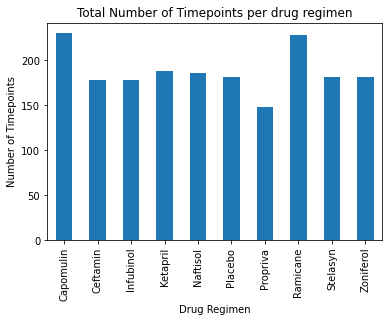

In [8]:
#generate bar plot for total number of timepoints for all mice tested for each drug regimen using pandas
#total number of the timepoint values per regimen
regimen_groupby_df["Timepoint"].count().plot(kind = 'bar')
plt.title('Total Number of Timepoints per drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

Text(0, 0.5, 'Number of Timepoints')

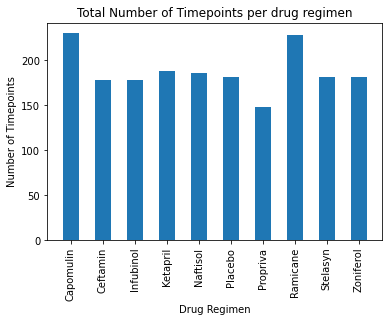

In [9]:
#generate bar plot for total number of timepoints for all mice tested for each drug regimen using matplotlib
drug_regimens = [value for value in list(regimen_groupby_df["Timepoint"].count().axes[0])]
x_axis = [x for x in range(len(drug_regimens))]
tick_locations = [value for value in x_axis]
total_timepoints = list(regimen_groupby_df["Timepoint"].count())

plt.bar(x_axis, total_timepoints, align = 'center', width = .5)
plt.xticks(tick_locations, drug_regimens, rotation="vertical")
plt.title('Total Number of Timepoints per drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

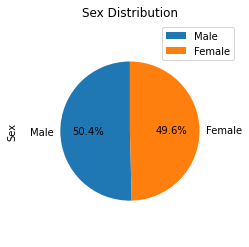

In [10]:
#generate pie chart showing the distribution of female vs male using pandas

#create mouseid and sex DataFrame
mouseid_and_sex_df = cleaned_merged_df.filter(['Mouse ID', 'Sex'])
mouseid_and_sex_df.drop_duplicates('Mouse ID', inplace = True)
mouseid_and_sex_df.reset_index(inplace=True)

del mouseid_and_sex_df['index']

#Create Pie Chart
sex_distribution = mouseid_and_sex_df['Sex'].value_counts()
sex_distribution.plot(kind = 'pie', startangle = 90, radius = .8, autopct="%1.1f%%")
plt.title('Sex Distribution')
plt.legend()

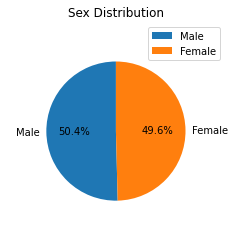

In [11]:
#generate pie chart showing the distribution of female vs male using matplotlib
sex_labels = [value for value in list(sex_distribution.axes[0])]
sex_count = list(sex_distribution)

plt.pie(sex_count, labels = sex_labels, startangle = 90, radius = .8, autopct="%1.1f%%")
plt.title('Sex Distribution')
plt.legend()

In [12]:
#final tumor volume
filtered_cleaned_df = cleaned_merged_df.loc[(cleaned_merged_df["Drug Regimen"] == "Capomulin") |
                      (cleaned_merged_df["Drug Regimen"] == "Ramicane") |
                      (cleaned_merged_df["Drug Regimen"] == "Infubinol") | 
                      (cleaned_merged_df["Drug Regimen"] == "Ceftamin"), :]

groupby_mouseid_df = filtered_cleaned_df.groupby('Mouse ID')
filter_df = groupby_mouseid_df['Timepoint'].max()

#Merge original df with filter to examine the final tumor sizes
filtered_merged_df = cleaned_merged_df.merge(filter_df, on=['Mouse ID', 'Timepoint'], how='inner')

#Check that only final tumor size points were kept in the DataFrame
filtered_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [13]:
#Create and populate a list of volumes for each drug regimen of interest (Ramicane, Capomulin, Infubinol, Ceftamin)
ramicane_vol = []
capomulin_vol = []
infubinol_vol = []
ceftamin_vol = []

for index, info in filtered_merged_df.iterrows():
    if info["Drug Regimen"] == "Ramicane":
        ramicane_vol.append(info["Tumor Volume (mm3)"])
    elif info['Drug Regimen'] == "Capomulin":
        capomulin_vol.append(info["Tumor Volume (mm3)"])
    elif info['Drug Regimen'] == "Infubinol":
        infubinol_vol.append(info["Tumor Volume (mm3)"])
    elif info['Drug Regimen'] == "Ceftamin":
        ceftamin_vol.append(info["Tumor Volume (mm3)"])
        

In [14]:
#Ramicane quartiles
ramicane_vol.sort()
ramicane_firstq, ramicane_median, ramicane_thirdq = np.quantile(ramicane_vol, [.25, .5, .75])
ramicane_iqr = ramicane_thirdq - ramicane_firstq
lower_bound_ram = ramicane_firstq - 1.5 * ramicane_iqr
upper_bound_ram = ramicane_thirdq + 1.5 * ramicane_iqr

#determine outliers
outliers_ramicane = [value for value in ramicane_vol if (value > upper_bound_ram) | (value < lower_bound_ram)]
print(f"There is/are {len(outliers_ramicane)} outlier(s) for Ramicane")

There is/are 0 outlier(s) for Ramicane


In [15]:
#Capomulin quartiles
capomulin_vol.sort()
capomulin_firstq, capomulin_median, capomulin_thirdq = np.quantile(capomulin_vol, [.25, .5, .75])
capomulin_iqr = capomulin_thirdq - capomulin_firstq
lower_bound_cap = capomulin_firstq - 1.5 * capomulin_iqr
upper_bound_cap = capomulin_thirdq + 1.5 * capomulin_iqr

#determine outliers
outliers_capomulin = [value for value in capomulin_vol if (value > upper_bound_cap) | (value < lower_bound_cap)]
print(f"There is/are {len(outliers_capomulin)} outlier(s) for Capomulin")

There is/are 0 outlier(s) for Capomulin


In [16]:
#Infubinol quartiles
infubinol_vol.sort()
infubinol_firstq, infubinol_median, infubinol_thirdq = np.quantile(infubinol_vol, [.25, .5, .75])
infubinol_iqr = infubinol_thirdq - infubinol_firstq
lower_bound_inf = infubinol_firstq - 1.5 * infubinol_iqr
upper_bound_inf = infubinol_thirdq + 1.5 * infubinol_iqr

outliers_infubinol = [value for value in infubinol_vol if (value > upper_bound_inf) | (value < lower_bound_inf)]
print(f"There is/are {len(outliers_infubinol)} outlier(s) for Infubinol")

There is/are 1 outlier(s) for Infubinol


In [17]:
#ceftamin quartiles
ceftamin_vol.sort()
ceftamin_firstq, ceftamin_median, ceftamin_thirdq = np.quantile(ceftamin_vol, [.25, .5, .75])
ceftamin_iqr = ceftamin_thirdq - ceftamin_firstq
lower_bound_cef = ceftamin_firstq - 1.5 * ceftamin_iqr
upper_bound_cef = ceftamin_thirdq + 1.5 * ceftamin_iqr

outliers_ceftamin = [value for value in ceftamin_vol if (value > upper_bound_cef) | (value < lower_bound_cef)]
print(f"There is/are {len(outliers_ceftamin)} outlier(s) for Ceftamin")

There is/are 0 outlier(s) for Ceftamin


([<matplotlib.axis.XTick at 0x2a8ad866970>,
 [Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Capomulin'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

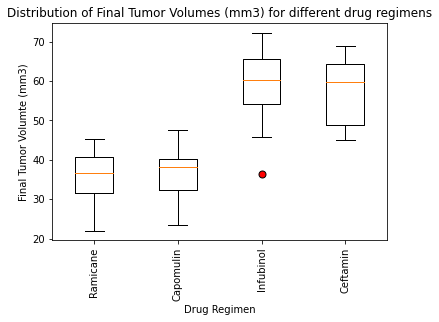

In [18]:
#generate boxplots
data = [ramicane_vol, capomulin_vol, infubinol_vol, ceftamin_vol]
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Final Tumor Volumes (mm3) for different drug regimens')
ax1.boxplot(data, flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'red'})
plt.ylabel('Final Tumor Volumte (mm3)')

#adjust x-axis
focused_drug_regimens = list(filtered_merged_df['Drug Regimen'].unique())
plt.xlabel('Drug Regimen')
x_axis = [x for x in range(len(focused_drug_regimens))]
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, labels = focused_drug_regimens, rotation="vertical")

In [19]:
#Line and Scatter Plots

#Create DataFrame with mice who were on just the Capomulin regimen
capomulin_mice_df = cleaned_merged_df.loc[cleaned_merged_df["Drug Regimen"] == 'Capomulin']
capomulin_mice_id = list(capomulin_mice_df["Mouse ID"].unique())
numb_of_cap_mice = len(capomulin_mice_id)

#pick a random mouse treated with Capomulin
import random
random_index = random.randrange(0, numb_of_cap_mice)
random_mouse = capomulin_mice_id[random_index]
random_mouse
#u364 was initially selected from the mice treated with capomulin

'b742'

Text(0.5, 1.0, 'Tumor Volume over Time for Mouse u364')

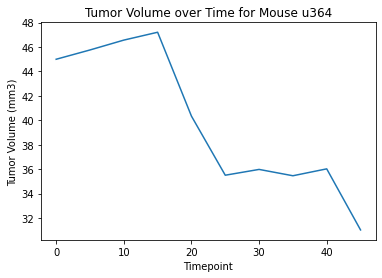

In [20]:
#generate line plot for random mouse
uthreesixfour_df = capomulin_mice_df.loc[capomulin_mice_df["Mouse ID"] == 'u364']
uthreesixfour_df
plt.plot(uthreesixfour_df['Timepoint'], uthreesixfour_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Mouse u364')

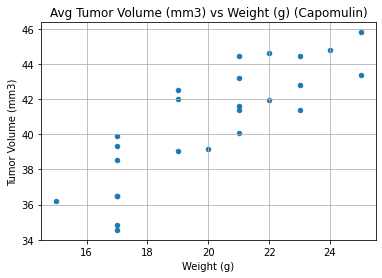

In [21]:
#Generate scatter plot 
groupby_capomulin_mice_df = capomulin_mice_df.groupby('Mouse ID')

groupby_capomulin_mice_df[['Tumor Volume (mm3)', 'Weight (g)']].mean().plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)",
                                                                            grid = True, title = "Avg Tumor Volume (mm3) vs Weight (g) (Capomulin)")

#linear regression
avg_tumor_vol = groupby_capomulin_mice_df['Tumor Volume (mm3)'].mean()
weights = groupby_capomulin_mice_df['Weight (g)'].mean()
vol_wght_slope, vol_wght_int, vol_wght_r, vol_wght_p, vol_wght_std_err = st.linregress(weights, avg_tumor_vol)

#EoL (Equation of Line)
vol_wght_fit = vol_wght_slope * weights + vol_wght_int

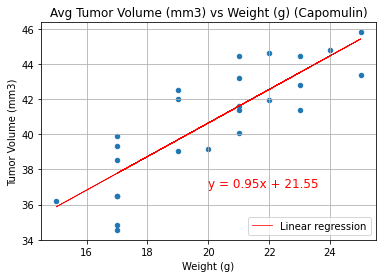

In [22]:
#plot the linear model
groupby_capomulin_mice_df[['Tumor Volume (mm3)', 'Weight (g)']].mean().plot(kind = "scatter", 
                                                                            x = "Weight (g)",
                                                                            y = "Tumor Volume (mm3)",
                                                                            grid = True,
                                                                            title = "Avg Tumor Volume (mm3) vs Weight (g) (Capomulin)"
                                                                           )
plt.plot(weights, vol_wght_fit, color = 'r', linestyle = '-', lw = .75, label='Linear regression')
line_eq = "y = " + str(round(vol_wght_slope, 2)) + "x + " + str(round(vol_wght_int, 2))
plt.annotate(line_eq, (20,37), fontsize = 12, color = 'red')
plt.legend(loc='lower right')
